# Simulation data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os.path import join
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
res_path = '../../../results/nursing_homes'

In [3]:
def get_image(df, subset, metric):
    subset = df.loc[subset]
    img = np.zeros((4,4))
    screening_intervals = ['none', 'once\na week', 'every\n3 days', 'every\n2 days']
    for i, p_index in enumerate(screening_intervals):
        for j, e_index in enumerate(screening_intervals):
            img[i, j] = subset.loc[p_index, e_index][metric]
    return img

def plot_heatmap_turnover_time(ax, img, vmin, vmax, xticks, yticks):
    cmap = plt.get_cmap('coolwarm')
    #im = ax.imshow(img, origin='lower', vmin=np.floor(img.min()),
    #               vmax=np.ceil(img.max()), cmap=cmap)
    im = ax.imshow(img, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    
    if xticks:
        ax.set_xticks(range(len(screening_intervals)))
        ax.set_xticklabels(screening_intervals, fontsize=9)
        ax.set_xlabel('screening frequency employees', fontsize=12)
    else:
        ax.set_xticks([])
    if yticks:    
        ax.set_yticks(range(len(screening_intervals)))
        ax.set_yticklabels(screening_intervals, fontsize=9)
        ax.set_ylabel('screening frequency residents', fontsize=12)
    else:
        ax.set_yticks([])
    
    return im

def annotate_heatmap(ax, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            y_pos = i - 0.05
            x_pos = j - 0.15
            ax.text(x_pos, y_pos, '{:1.2f}'.format(img[i, j]))

frequency_name_map = {np.nan:'none',
              2:'every\n2 days',
              3:'every\n3 days',
              7:'once\na week'}

test_name_map = {'same_day_antigen':'same-day antigen', 'one_day_PCR':'one day PCR',
             'two_day_PCR':'two days PCR', 'same_day_PCR':'same-day PCR',
             'same_day_LAMP':'same-day RT-LAMP'}

metric_name_map = {'infected_residents_mean':'follow-up cases residents (mean)',
                   'infected_residents_median':'follow-up cases residends (median)',
                   'R0_mean':'$R_0$',
                   'R0_mean':'$R_0$'}

index_case_map = {'employee':'index case employee',
                  'resident':'index case resident'}

screening_intervals = ['none', 'once\na week', 'every\n3 days', 'every\n2 days']

## Preventive screening frequency

In [4]:
N = 10000
sim_name = 'simulation_results'
data = pd.read_csv(join(res_path,'simulation_results/{}_N{}.csv'.format(sim_name, N)))
data['N_tests_mean'] = data['N_diagnostic_tests_mean'] + data['N_preventive_tests_mean']

In [5]:
data = data[[
    'index_case', 'test_type',
    'employee_screen_interval','resident_screen_interval',
             
    'infected_residents_median', 'infected_residents_0.025',
    'infected_residents_0.25', 'infected_residents_0.75',
    'infected_residents_0.975', 'infected_residents_mean',
    'infected_residents_std',
             
    'infected_employees_median', 'infected_employees_0.025',
    'infected_employees_0.25', 'infected_employees_0.75',
    'infected_employees_0.975', 'infected_employees_mean',
    'infected_employees_std',
             
    'N_employee_screens_median','N_employee_screens_0.025',
    'N_employee_screens_0.25', 'N_employee_screens_0.75',
    'N_employee_screens_0.975', 'N_employee_screens_mean',
    'N_employee_screens_std',
             
    'N_resident_screens_median','N_resident_screens_0.025',
    'N_resident_screens_0.25', 'N_resident_screens_0.75',
    'N_resident_screens_0.975', 'N_resident_screens_mean',
    'N_resident_screens_std',
    
    'N_tests_mean',
    'N_diagnostic_tests_median', 'N_diagnostic_tests_0.025',
    'N_diagnostic_tests_0.25', 'N_diagnostic_tests_0.75',
    'N_diagnostic_tests_0.975', 'N_diagnostic_tests_mean', 
    'N_diagnostic_tests_std', 
    
    'N_preventive_tests_median', 'N_preventive_tests_0.025',
    'N_preventive_tests_0.25', 'N_preventive_tests_0.75',
    'N_preventive_tests_0.975', 'N_preventive_tests_mean', 
    'N_preventive_tests_std', 
        
    'R0_median', 'R0_0.025', 'R0_0.25', 'R0_0.75',
    'R0_0.975', 'R0_mean', 'R0_std',
    
    'duration_median', 'duration_0.025', 'duration_0.25',
    'duration_0.75', 'duration_0.975', 'duration_mean',  'duration_std',

    'pending_test_infections_median', 'pending_test_infections_0.025',
    'pending_test_infections_0.25', 'pending_test_infections_0.75',
    'pending_test_infections_0.975', 'pending_test_infections_mean', 
    'pending_test_infections_std', 
    
    'predetected_infections_median', 'predetected_infections_0.025',
    'predetected_infections_0.25', 'predetected_infections_0.75',
    'predetected_infections_0.975', 'predetected_infections_mean', 
    'predetected_infections_std', 
    
    'undetected_infections_median', 'undetected_infections_0.025',
    'undetected_infections_0.25', 'undetected_infections_0.75',
    'undetected_infections_0.975', 'undetected_infections_mean', 
    'undetected_infections_std', 
    
    'transmissions_median', 'transmissions_0.025',
    'transmissions_0.25', 'transmissions_0.75',
    'transmissions_0.975', 'transmissions_mean', 
    'transmissions_std', ]]

data = data.sort_values(by = ['index_case', 'test_type', 'employee_screen_interval', 'resident_screen_interval'])
data.to_csv(join(res_path, 'simulation_results/test_type_N{}.csv'.format(N)), index=False)


In [6]:
data['resident_screen_interval'] = data['resident_screen_interval']\
    .replace(frequency_name_map)
data['employee_screen_interval'] = data['employee_screen_interval'].replace(frequency_name_map)

tuples = [(r['test_type'], r['resident_screen_interval'], r['employee_screen_interval'])\
             for i,r in data.iterrows()]
index = pd.MultiIndex.from_tuples(tuples,\
                        names=['test_type', 'resident_screen_interval', 'employee_screen_interval'])
data = data.set_index(index)

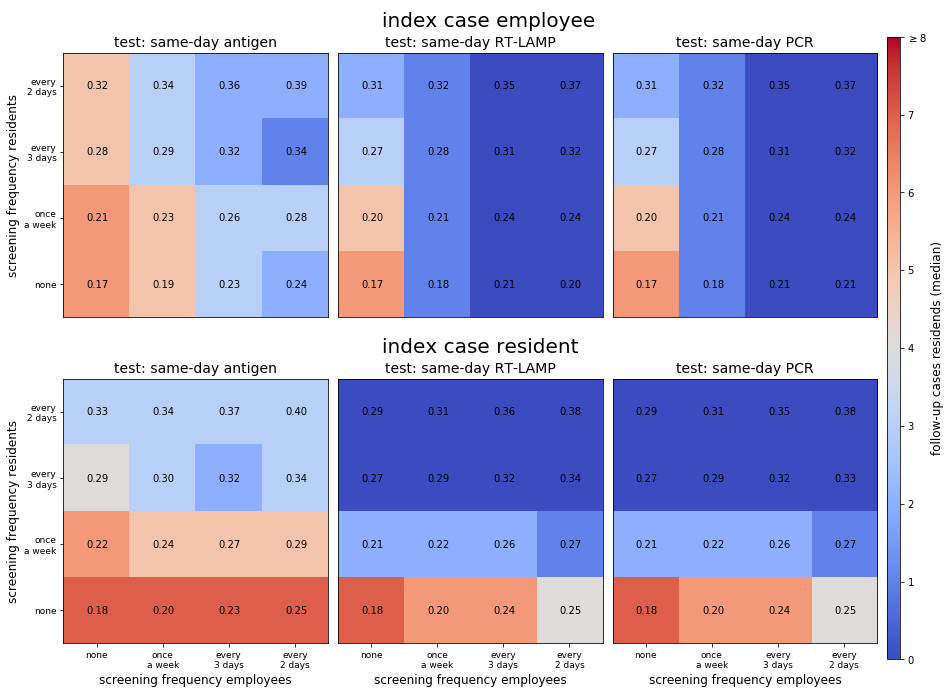

In [8]:
metric = 'infected_residents_median'
sim_name = 'preventive_screening_interval_test_type'
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(nrows=4, ncols=4, width_ratios=[1,1,1, 0.05],\
                       height_ratios=[0.1,1,0.1,1], wspace=0.05, hspace=0)

title_ax_1 = fig.add_subplot(gs[0, 0:])
hmap_ax_1 = fig.add_subplot(gs[1, 0])
hmap_ax_2 = fig.add_subplot(gs[1, 1])
hmap_ax_3 = fig.add_subplot(gs[1, 2])

title_ax_2 = fig.add_subplot(gs[2, 0:])
hmap_ax_4 = fig.add_subplot(gs[3, 0])
hmap_ax_5 = fig.add_subplot(gs[3, 1])
hmap_ax_6 = fig.add_subplot(gs[3, 2])

cbar_ax = fig.add_subplot(gs[1:, 3])

hmap_axes = [[hmap_ax_1, hmap_ax_2, hmap_ax_3], [hmap_ax_4, hmap_ax_5, hmap_ax_6]]
title_axes = [title_ax_1, title_ax_2]
vmin=0
vmax=8
vstep=1

for i, index_case in enumerate(['employee', 'resident']):
    df = data[data['index_case'] == index_case]
    t_ax = title_axes[i]
    t_ax.set_xticks([])
    t_ax.set_yticks([])
    t_ax.set_frame_on(False)
    t_ax.set_xlim(0, 1)
    t_ax.set_ylim(0, 3)
    t_ax.text(0.38, 1, index_case_map[index_case], fontsize=20)
        
    j = 0
    for ax, test_type in zip(hmap_axes[i],\
                        ['same_day_antigen', 'same_day_LAMP', 'same_day_PCR']):
        xticks = False
        yticks = False
        if i > 0:
            xticks = True
        if j in [0, 3]:
            yticks = True
        
        # plot heatmap
        img = get_image(df, test_type, metric)
        if index_case == 'resident':
            img = img - 1
        img_plot = plot_heatmap_turnover_time(ax, img, vmin, vmax, xticks, yticks)
        
        # annotate heatmap with tests / days / agent
        tests_per_agent = get_image(df,
                     test_type, 'N_tests_mean') / (35+18)

        duration = get_image(df,
                     test_type, 'duration_mean')
        
        annotate_heatmap(ax, tests_per_agent / duration)

        ax.set_title('test: {}'\
                .format(test_name_map[test_type]), fontsize=14)
        
        j += 1

# colorbar
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap= plt.get_cmap('coolwarm'), norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical',\
                        ticks=np.arange(vmin, vmax + 1, vstep))
cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=12)    
cbar.ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7, '$\geq 8$'])
        
plt.savefig(join(res_path, 'plots/{}_{}.pdf'.format(sim_name, metric)),
           transparent=True)

plt.savefig(join(res_path, 'plots/{}_{}.png'.format(sim_name, metric)),
           transparent=True, dpi=300)

plt.savefig(join(res_path, 'plots/{}_{}.svg'.format(sim_name, metric)),
           transparent=True, dpi=300)

## Turnover time

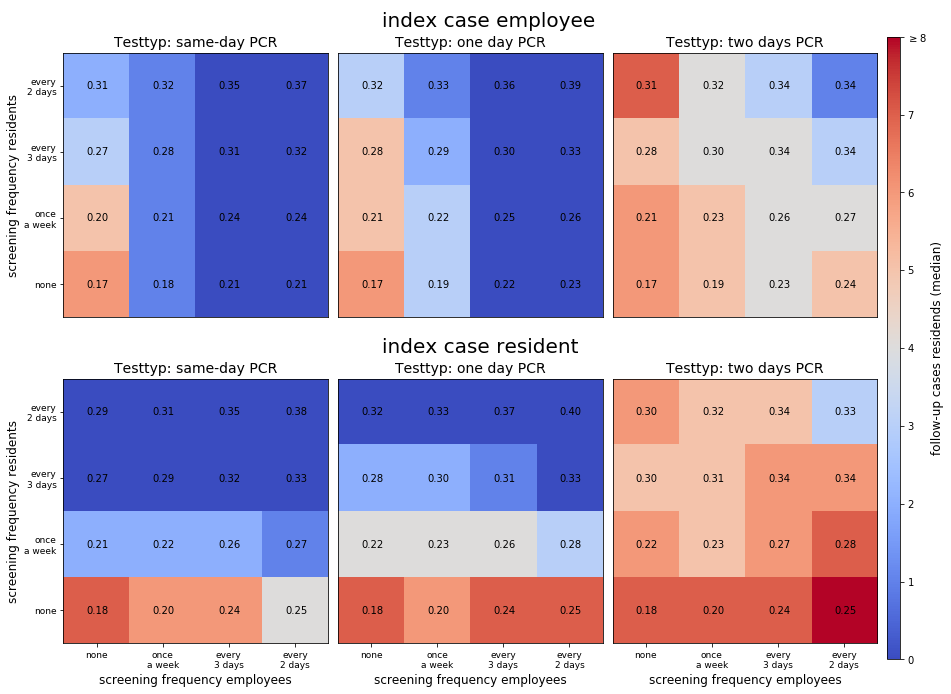

In [10]:
metric = 'infected_residents_median'
sim_name = 'turnover_time'

# figure layout & axis setup
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(nrows=4, ncols=4, width_ratios=[1,1,1, 0.05],\
                       height_ratios=[0.1,1,0.1,1], wspace=0.05, hspace=0)

title_ax_1 = fig.add_subplot(gs[0, 0:])
hmap_ax_1 = fig.add_subplot(gs[1, 0])
hmap_ax_2 = fig.add_subplot(gs[1, 1])
hmap_ax_3 = fig.add_subplot(gs[1, 2])

title_ax_2 = fig.add_subplot(gs[2, 0:])
hmap_ax_4 = fig.add_subplot(gs[3, 0])
hmap_ax_5 = fig.add_subplot(gs[3, 1])
hmap_ax_6 = fig.add_subplot(gs[3, 2])

cbar_ax = fig.add_subplot(gs[1:, 3])

hmap_axes = [[hmap_ax_1, hmap_ax_2, hmap_ax_3], [hmap_ax_4, hmap_ax_5, hmap_ax_6]]
title_axes = [title_ax_1, title_ax_2]

# possible range of median outbreak sizes to fix the dynamic range of the
# colormaps
vmin = 0
vmax = 8
tickstep = 1

# compare scenarios in which either employees or residents are the index case
for i, index_case_mode in enumerate(['employee', 'resident']):
    df = data[data['index_case'] == index_case_mode]
    
    # set flag to set axis ticks only for heatmaps at the boundaries of 
    # the figure
    t_ax = title_axes[i]
    t_ax.set_xticks([])
    t_ax.set_yticks([])
    t_ax.set_frame_on(False)
    t_ax.set_xlim(0, 1)
    t_ax.set_ylim(0, 3)
    t_ax.text(0.38, 1, index_case_map[index_case_mode], fontsize=20)
    
    # compare different test result turnover times for PCR tests
    for j, ax, test_type in zip(range(3), hmap_axes[i], \
                        ['same_day_PCR', 'one_day_PCR', 'two_day_PCR']):
        
            # put the turnover time in the heatmap title
        ax.set_title('Testtyp: {}'\
                .format(test_name_map[test_type]), fontsize=14)
        
        xticks = False
        yticks = False
        if i > 0:
            xticks = True
        if j in [0, 3]:
            yticks = True
        
        # plot heatmap of the scenario
        img = get_image(df, test_type, metric)
        if index_case_mode == 'resident':
            img = img - 1
        img_plot = plot_heatmap_turnover_time(ax, img, vmin, vmax, xticks, yticks)
        
        # annotate heatmap with tests / days / agent
        tests_per_agent = get_image(df, test_type, 'N_tests_mean') / (35+18)
        duration = get_image(df,test_type, 'duration_mean')
        tests_per_agent_per_day = tests_per_agent / duration
        annotate_heatmap(ax, tests_per_agent_per_day)

# colorbar
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap= plt.get_cmap('coolwarm'), norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical',\
                ticks=np.arange(vmin, vmax+1, tickstep))
cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=12)  
cbar.ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7, '$\geq 8$'])

plt.savefig(join(res_path, 'plots/{}_{}.pdf'.format(sim_name, metric)),
           transparent=True)

plt.savefig(join(res_path, 'plots/{}_{}.png'.format(sim_name, metric)),
           transparent=True, dpi=300)

plt.savefig(join(res_path, 'plots/{}_{}.svg'.format(sim_name, metric)),
           transparent=True, dpi=300)

## Test rate

In [9]:
no_screens = data[(data['employee_screen_interval'] == 'none') & (data['resident_screen_interval'] == 'none')]
tests_per_person = no_screens['N_diagnostic_tests_mean'] / (35 + 18)
tests_per_person_per_day = tests_per_person / no_screens['duration_mean']

In [10]:
tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       none                      none                        0.169716
same_day_LAMP     none                      none                        0.170208
same_day_PCR      none                      none                        0.169969
same_day_antigen  none                      none                        0.169039
two_day_PCR       none                      none                        0.170473
one_day_PCR       none                      none                        0.180337
same_day_LAMP     none                      none                        0.180785
same_day_PCR      none                      none                        0.180623
same_day_antigen  none                      none                        0.180657
two_day_PCR       none                      none                        0.180228
dtype: float64

In [11]:
std_tests_per_person = no_screens['N_diagnostic_tests_std'] / (35 + 18)
std_tests_per_person_per_day = std_tests_per_person / no_screens['duration_mean']
std_tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       none                      none                        0.097966
same_day_LAMP     none                      none                        0.098649
same_day_PCR      none                      none                        0.097726
same_day_antigen  none                      none                        0.098443
two_day_PCR       none                      none                        0.098222
one_day_PCR       none                      none                        0.080688
same_day_LAMP     none                      none                        0.080825
same_day_PCR      none                      none                        0.081301
same_day_antigen  none                      none                        0.081969
two_day_PCR       none                      none                        0.080683
dtype: float64

In [12]:
employee_screens = data[(data['employee_screen_interval'] == 'every\n3 days') & (data['resident_screen_interval'] == 'none')]
tests_per_person = employee_screens['N_tests_mean'] / (35 + 18)
tests_per_person_per_day = tests_per_person / employee_screens['duration_mean']

In [13]:
tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       none                      every\n3 days               0.224147
same_day_LAMP     none                      every\n3 days               0.206024
same_day_PCR      none                      every\n3 days               0.205478
same_day_antigen  none                      every\n3 days               0.227205
two_day_PCR       none                      every\n3 days               0.232959
one_day_PCR       none                      every\n3 days               0.240528
same_day_LAMP     none                      every\n3 days               0.235062
same_day_PCR      none                      every\n3 days               0.236167
same_day_antigen  none                      every\n3 days               0.234614
two_day_PCR       none                      every\n3 days               0.240708
dtype: float64

In [14]:
std_tests_per_person = np.sqrt(employee_screens['N_diagnostic_tests_std'] ** 2 + \
                               employee_screens['N_preventive_tests_std'] ** 2) / (35 + 18)
std_tests_per_person_per_day = std_tests_per_person / employee_screens['duration_mean']
std_tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       none                      every\n3 days               0.168939
same_day_LAMP     none                      every\n3 days               0.153528
same_day_PCR      none                      every\n3 days               0.154453
same_day_antigen  none                      every\n3 days               0.124794
two_day_PCR       none                      every\n3 days               0.123405
one_day_PCR       none                      every\n3 days               0.105979
same_day_LAMP     none                      every\n3 days               0.093121
same_day_PCR      none                      every\n3 days               0.092253
same_day_antigen  none                      every\n3 days               0.088596
two_day_PCR       none                      every\n3 days               0.087857
dtype: float64

In [15]:
resident_screens = data[(data['resident_screen_interval'] == 'every\n3 days') & (data['employee_screen_interval'] == 'none')]
tests_per_person = resident_screens['N_tests_mean'] / (35 + 10)
tests_per_person_per_day = tests_per_person / resident_screens['duration_mean']

In [16]:
tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       every\n3 days             none                        0.327094
same_day_LAMP     every\n3 days             none                        0.321120
same_day_PCR      every\n3 days             none                        0.321394
same_day_antigen  every\n3 days             none                        0.325302
two_day_PCR       every\n3 days             none                        0.335659
one_day_PCR       every\n3 days             none                        0.333771
same_day_LAMP     every\n3 days             none                        0.319386
same_day_PCR      every\n3 days             none                        0.319186
same_day_antigen  every\n3 days             none                        0.337949
two_day_PCR       every\n3 days             none                        0.349153
dtype: float64

In [17]:
std_tests_per_person = np.sqrt(resident_screens['N_diagnostic_tests_std'] ** 2 + \
                               resident_screens['N_preventive_tests_std'] ** 2) / (35 + 10)
std_tests_per_person_per_day = std_tests_per_person / resident_screens['duration_mean']
std_tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       every\n3 days             none                        0.182790
same_day_LAMP     every\n3 days             none                        0.138843
same_day_PCR      every\n3 days             none                        0.139319
same_day_antigen  every\n3 days             none                        0.134517
two_day_PCR       every\n3 days             none                        0.135600
one_day_PCR       every\n3 days             none                        0.219572
same_day_LAMP     every\n3 days             none                        0.181522
same_day_PCR      every\n3 days             none                        0.180752
same_day_antigen  every\n3 days             none                        0.138432
two_day_PCR       every\n3 days             none                        0.133272
dtype: float64

In [18]:
both_screens = data[(data['employee_screen_interval'] == 'every\n2 days') & (data['resident_screen_interval'] == 'every\n2 days')]
tests_per_person = both_screens['N_tests_mean'] / (35 + 18)
tests_per_person_per_day = tests_per_person / both_screens['duration_mean']

In [19]:
tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       every\n2 days             every\n2 days               0.390662
same_day_LAMP     every\n2 days             every\n2 days               0.368017
same_day_PCR      every\n2 days             every\n2 days               0.367601
same_day_antigen  every\n2 days             every\n2 days               0.393441
two_day_PCR       every\n2 days             every\n2 days               0.336690
one_day_PCR       every\n2 days             every\n2 days               0.401155
same_day_LAMP     every\n2 days             every\n2 days               0.375679
same_day_PCR      every\n2 days             every\n2 days               0.376768
same_day_antigen  every\n2 days             every\n2 days               0.397837
two_day_PCR       every\n2 days             every\n2 days               0.333217
dtype: float64

In [20]:
std_tests_per_person = np.sqrt(both_screens['N_diagnostic_tests_std'] ** 2 + \
                               both_screens['N_preventive_tests_std'] ** 2) / (35 + 10)
std_tests_per_person_per_day = std_tests_per_person / both_screens['duration_mean']
std_tests_per_person_per_day

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       every\n2 days             every\n2 days               0.134693
same_day_LAMP     every\n2 days             every\n2 days               0.062327
same_day_PCR      every\n2 days             every\n2 days               0.062497
same_day_antigen  every\n2 days             every\n2 days               0.190958
two_day_PCR       every\n2 days             every\n2 days               0.145195
one_day_PCR       every\n2 days             every\n2 days               0.133954
same_day_LAMP     every\n2 days             every\n2 days               0.067914
same_day_PCR      every\n2 days             every\n2 days               0.067561
same_day_antigen  every\n2 days             every\n2 days               0.167963
two_day_PCR       every\n2 days             every\n2 days               0.128149
dtype: float64

## Outbreak size

In [21]:
no_screens = data[(data['employee_screen_interval'] == 'none') & (data['resident_screen_interval'] == 'none')]

no_screens['infected_residents_median'] - 1

test_type         resident_screen_interval  employee_screen_interval
one_day_PCR       none                      none                        5.0
same_day_LAMP     none                      none                        5.0
same_day_PCR      none                      none                        5.0
same_day_antigen  none                      none                        5.0
two_day_PCR       none                      none                        5.0
one_day_PCR       none                      none                        7.0
same_day_LAMP     none                      none                        7.0
same_day_PCR      none                      none                        7.0
same_day_antigen  none                      none                        7.0
two_day_PCR       none                      none                        7.0
Name: infected_residents_median, dtype: float64

## False negatives

In [22]:
antigen = data[(data['test_type'] == 'same_day_antigen') & \
               (data['resident_screen_interval'] != 'none') & \
               (data['employee_screen_interval'] != 'none')]

antigen['undetected_infections_mean']

test_type         resident_screen_interval  employee_screen_interval
same_day_antigen  every\n2 days             every\n2 days               2.6136
                  every\n3 days             every\n2 days               1.8129
                  once\na week              every\n2 days               1.3624
                  every\n2 days             every\n3 days               2.0800
                  every\n3 days             every\n3 days               0.2934
                  once\na week              every\n3 days               0.7119
                  every\n2 days             once\na week                1.7960
                  every\n3 days             once\na week                0.5896
                  once\na week              once\na week                0.8275
                  every\n2 days             every\n2 days               3.1000
                  every\n3 days             every\n2 days               2.1938
                  once\na week              every\n2 days     

In [23]:
antigen['N_preventive_tests_median']

test_type         resident_screen_interval  employee_screen_interval
same_day_antigen  every\n2 days             every\n2 days               270.0
                  every\n3 days             every\n2 days               227.0
                  once\na week              every\n2 days               132.0
                  every\n2 days             every\n3 days               259.0
                  every\n3 days             every\n3 days               226.0
                  once\na week              every\n3 days               106.0
                  every\n2 days             once\na week                240.0
                  every\n3 days             once\na week                180.0
                  once\na week              once\na week                 70.0
                  every\n2 days             every\n2 days               307.0
                  every\n3 days             every\n2 days               242.0
                  once\na week              every\n2 days               1

In [24]:
antigen['N_diagnostic_tests_median']

test_type         resident_screen_interval  employee_screen_interval
same_day_antigen  every\n2 days             every\n2 days               155.0
                  every\n3 days             every\n2 days               153.0
                  once\na week              every\n2 days               205.0
                  every\n2 days             every\n3 days               155.0
                  every\n3 days             every\n3 days               153.0
                  once\na week              every\n3 days               239.0
                  every\n2 days             once\na week                244.0
                  every\n3 days             once\na week                238.0
                  once\na week              once\na week                279.0
                  every\n2 days             every\n2 days               204.0
                  every\n3 days             every\n2 days               245.0
                  once\na week              every\n2 days               2

## Pre-detections

In [25]:
PCR = data[data['test_type'].isin(['same_day_PCR', 'one_day_PCR', 'two_days_PCR'])]

PCR['predetected_infections_median']

test_type     resident_screen_interval  employee_screen_interval
one_day_PCR   every\n2 days             every\n2 days               1.0
              every\n3 days             every\n2 days               1.0
              once\na week              every\n2 days               1.0
              none                      every\n2 days               1.0
              every\n2 days             every\n3 days               1.0
                                                                   ... 
same_day_PCR  none                      once\na week                6.0
              every\n2 days             none                        0.0
              every\n3 days             none                        0.0
              once\na week              none                        2.0
              none                      none                        7.0
Name: predetected_infections_median, Length: 64, dtype: float64

In [26]:
data

index_case  \
test_type   resident_screen_interval employee_screen_interval              
one_day_PCR every\n2 days            every\n2 days              employee   
            every\n3 days            every\n2 days              employee   
            once\na week             every\n2 days              employee   
            none                     every\n2 days              employee   
            every\n2 days            every\n3 days              employee   
...                                                                  ...   
two_day_PCR none                     once\na week               resident   
            every\n2 days            none                       resident   
            every\n3 days            none                       resident   
            once\na week             none                       resident   
            none                     none                       resident   

                                                                 test_type  \
test_type   resident_screen_interval employee_screen_interval                
one_day_PCR every\n2 days            every\n2 days             one_day_PCR   
            every\n3 days            every\n2 days             one_day_PCR   
            once\na week             every\n2 days             one_day_PCR   
            none                     every\n2 days             one_day_PCR   
            every\n2 days            every\n3 days             one_day_PCR   
...                                                                    ...   
two_day_PCR none                     once\na week              two_day_PCR   
            every\n2 days            none                      two_day_PCR   
            every\n3 days            none                      two_day_PCR   
            once\na week             none                      two_day_PCR   
            none                     none                      two_day_PCR   

                                                              employee_screen_interval  \
test_type   resident_screen_interval employee_screen_interval                            
one_day_PCR every\n2 days            every\n2 days                       every\n2 days   
            every\n3 days            every\n2 days                       every\n2 days   
            once\na week             every\n2 days                       every\n2 days   
            none                     every\n2 days                       every\n2 days   
            every\n2 days            every\n3 days                       every\n3 days   
...                                                                                ...   
two_day_PCR none                     once\na week                         once\na week   
            every\n2 days            none                                         none   
            every\n3 days            none                                         none   
            once\na week             none                                         none   
            none                     none                                         none   

                                                              resident_screen_interval  \
test_type   resident_screen_interval employee_screen_interval                            
one_day_PCR every\n2 days            every\n2 days                       every\n2 days   
            every\n3 days            every\n2 days                       every\n3 days   
            once\na week             every\n2 days                        once\na week   
            none                     every\n2 days                                none   
            every\n2 days            every\n3 days                       every\n2 days   
...                                                                                ...   
two_day_PCR none                     once\na week                                 none   
            every\n2 days            none                                ever

## Info-Table

In [28]:
data[(data['test_type'].isin(['same_day_LAMP', 'same_day_antigen', 'same_day_PCR'])) & \
                  data['resident_screen_interval'].isin(['none', 'once\na week']) & \
                  data['employee_screen_interval'].isin(['every\n3 days', 'once\na week']) &\
                  (data['index_case'] == 'employee')]

index_case  \
test_type        resident_screen_interval employee_screen_interval              
same_day_LAMP    once\na week             every\n3 days              employee   
                 none                     every\n3 days              employee   
                 once\na week             once\na week               employee   
                 none                     once\na week               employee   
same_day_PCR     once\na week             every\n3 days              employee   
                 none                     every\n3 days              employee   
                 once\na week             once\na week               employee   
                 none                     once\na week               employee   
same_day_antigen once\na week             every\n3 days              employee   
                 none                     every\n3 days              employee   
                 once\na week             once\na week               employee   
                 none                     once\na week               employee   

                                                                           test_type  \
test_type        resident_screen_interval employee_screen_interval                     
same_day_LAMP    once\na week             every\n3 days                same_day_LAMP   
                 none                     every\n3 days                same_day_LAMP   
                 once\na week             once\na week                 same_day_LAMP   
                 none                     once\na week                 same_day_LAMP   
same_day_PCR     once\na week             every\n3 days                 same_day_PCR   
                 none                     every\n3 days                 same_day_PCR   
                 once\na week             once\na week                  same_day_PCR   
                 none                     once\na week                  same_day_PCR   
same_day_antigen once\na week             every\n3 days             same_day_antigen   
                 none                     every\n3 days             same_day_antigen   
                 once\na week             once\na week              same_day_antigen   
                 none                     once\na week              same_day_antigen   

                                                                   employee_screen_interval  \
test_type        resident_screen_interval employee_screen_interval                            
same_day_LAMP    once\na week             every\n3 days                       every\n3 days   
                 none                     every\n3 days                       every\n3 days   
                 once\na week             once\na week                         once\na week   
                 none                     once\na week                         once\na week   
same_day_PCR     once\na week             every\n3 days                       every\n3 days   
                 none                     every\n3 days                       every\n3 days   
                 once\na week             once\na week                         once\na week   
                 none                     once\na week                         once\na week   
same_day_antigen once\na week             every\n3 days                       every\n3 days   
                 none                     every\n3 days                       every\n3 days   
                 once\na week             once\na week                         once\na week   
                 none                     once\na week                         once\na week   

                                                                   resident_screen_interval  \
test_type        resident_screen_interval employee_screen_interval                            
same_day_LAMP    once\na week             every\n3 days                        once\na week   
                 none                     every\n3 days                            

In [29]:
table_data = data[(data['test_type'].isin(['same_day_LAMP', 'same_day_antigen', 'same_day_PCR'])) & \
                  (data['resident_screen_interval'].isin(['none', 'once\na week'])) & \
                  (data['index_case'] == 'employee')].copy()
table_data['test_rate'] = (table_data['N_preventive_tests_mean'] + \
                           table_data['N_diagnostic_tests_mean']) / table_data['duration_mean'] / (35+18)
table_data['test_rate_std'] = np.sqrt(table_data['N_diagnostic_tests_std'] ** 2 + \
                               table_data['N_preventive_tests_std'] ** 2) / (35 + 18) / table_data['duration_mean']
table_data = table_data.reset_index(drop=True)
table_data['employee_screen_interval'] = table_data['employee_screen_interval'].replace(\
                                                {'once\na week':'every 7 days',
                                                 'every\n2 days':'every 2 days', 
                                                 'every\n3 days':'every 3 days',
                                                 'none':'never'})
table_data['resident_screen_interval'] = table_data['resident_screen_interval'].replace(\
                                                {'once\na week':'every 7 days',
                                                 'every\n2 days':'every 2 days', 
                                                 'every\n3 days':'every 3 days',
                                                 'none':'never'})
table_data = table_data.sort_values(by=['test_type', 'employee_screen_interval'])

In [30]:
table_data = table_data[['test_type', 'employee_screen_interval', 'resident_screen_interval',
            'infected_residents_mean', 'infected_residents_std', 'infected_residents_median', \
            'infected_residents_0.25', 'infected_residents_0.75', 'test_rate',
            'test_rate_std']]

In [32]:
table_data.to_csv('../../../results/nursing_homes/simulation_results/info_table_for_publication.csv',
                 index=False)

## Follow up interval

In [143]:
def get_image_follow_up_interval(df, subset, metric):
    subset = df.loc[subset]
    img = np.zeros((3,5))
    follow_ip_intervals = [6, 5, 4, 3, 2]
    test_types = ['same_day_PCR', 'one_day_PCR', 'two_day_PCR']
    for i, t_index in enumerate(test_types):
        for j, f_index in enumerate(follow_ip_intervals):
            img[i, j] = subset.loc[t_index, f_index][metric] - 1
    return img

def plot_heatmap_follow_up_interval(ax, img, vmin, vmax):
    cmap = plt.get_cmap('coolwarm')
    #im = ax.imshow(img, origin='lower', vmin=np.floor(img.min()),
    #               vmax=np.ceil(img.max()), cmap=cmap)
    im = ax.imshow(img, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    
    follow_up_intervals = [6, 5, 4, 3, 2]
    test_types = ['same_day_PCR', 'one_day_PCR', 'two_day_PCR']
    test_type_names = [test_name_map[test] for test in test_types]
    ax.set_xticks(range(len(follow_up_intervals)))
    ax.set_yticks(range(len(test_type_names)))
    ax.set_xticklabels(follow_up_intervals, fontsize=9)
    ax.set_yticklabels(test_type_names, fontsize=9)
    ax.set_xlabel('Follow-up scan interval')
    ax.set_ylabel('Test turnover time')
    
    return im

In [144]:
sim_name = 'follow_up_interval'
N = 1000
data = pd.read_csv(join(res_path,'simulation_results/{}_N{}.csv'.format(sim_name, N)))

tuples = [(r['index_case_mode'], r['test_type'], r['follow_up_interval'])\
             for i,r in data.iterrows()]
index = pd.MultiIndex.from_tuples(tuples,\
                        names=['index_case_mode', 'test_type', 'follow_up_interval'])
data = data.set_index(index)

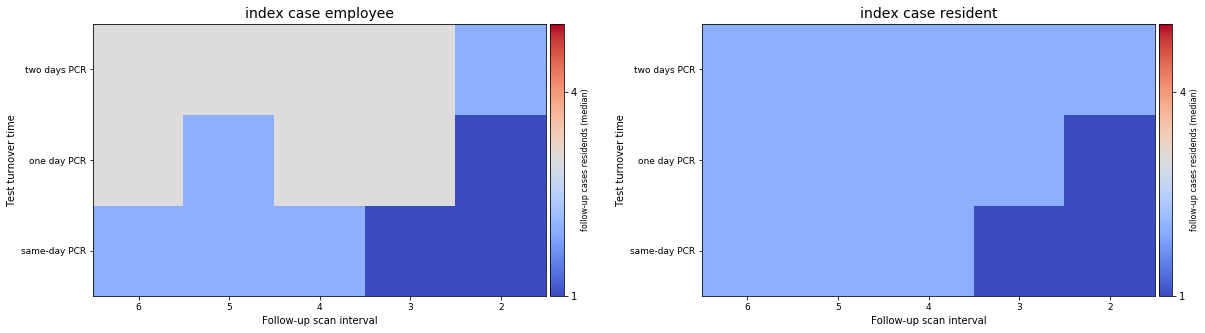

In [145]:
metric = 'infected_residents_median'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

vmin = 1
vmax = 5
tickstep = 3


for ax, index_case_mode in zip(axes, data['index_case_mode'].unique()):
    img = get_image_follow_up_interval(data, index_case_mode, metric)
    img_plot = plot_heatmap_follow_up_interval(ax, img, vmin, vmax)

    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    #cbar = fig.colorbar(img_plot, cax=cax, orientation='vertical',\
    #                ticks=np.arange(np.floor(img.min()), np.ceil(img.max()) + 1))
    cbar = fig.colorbar(img_plot, cax=cax, orientation='vertical',\
                    ticks=np.arange(vmin, vmax + 1, tickstep))
    #cbar.ax.set_yticklabels(['{:d}'.format(int(i)) for \
    #                i in np.arange(np.floor(img.min()), np.ceil(img.max()) + 1)])
    cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=8)

    ax.set_title('{}'\
            .format(index_case_map[index_case_mode]), fontsize=14)

plt.savefig(join(res_path, 'plots/{}_{}.pdf'.format(sim_name, metric)),
       transparent=True)
plt.savefig(join(res_path, 'plots/{}_{}.png'.format(sim_name, metric)),
       transparent=True, dpi=300)

## False negative results

In [33]:
data[data['test_type'] == 'same_day_antigen'][['index_case', 'test_type', 'employee_screen_interval',
       'resident_screen_interval', 'infected_residents_mean',
       'undetected_infections_mean', 'N_tests_mean']]

index_case  \
test_type        resident_screen_interval employee_screen_interval              
same_day_antigen every\n2 days            every\n2 days              employee   
                 every\n3 days            every\n2 days              employee   
                 once\na week             every\n2 days              employee   
                 none                     every\n2 days              employee   
                 every\n2 days            every\n3 days              employee   
                 every\n3 days            every\n3 days              employee   
                 once\na week             every\n3 days              employee   
                 none                     every\n3 days              employee   
                 every\n2 days            once\na week               employee   
                 every\n3 days            once\na week               employee   
                 once\na week             once\na week               employee   
                 none                     once\na week               employee   
                 every\n2 days            none                       employee   
                 every\n3 days            none                       employee   
                 once\na week             none                       employee   
                 none                     none                       employee   
                 every\n2 days            every\n2 days              resident   
                 every\n3 days            every\n2 days              resident   
                 once\na week             every\n2 days              resident   
                 none                     every\n2 days              resident   
                 every\n2 days            every\n3 days              resident   
                 every\n3 days            every\n3 days              resident   
                 once\na week             every\n3 days              resident   
                 none                     every\n3 days              resident   
                 every\n2 days            once\na week               resident   
                 every\n3 days            once\na week               resident   
                 once\na week             once\na week               resident   
                 none                     once\na week               resident   
                 every\n2 days            none                       resident   
                 every\n3 days            none                       resident   
                 once\na week             none                       resident   
                 none                     none                       resident   

                                                                           test_type  \
test_type        resident_screen_interval employee_screen_interval                     
same_day_antigen every\n2 days            every\n2 days             same_day_antigen   
                 every\n3 days            every\n2 days             same_day_antigen   
                 once\na week             every\n2 days             same_day_antigen   
                 none                     every\n2 days             same_day_antigen   
                 every\n2 days            every\n3 days             same_day_antigen   
                 every\n3 days            every\n3 days             same_day_antigen   
                 once\na week             every\n3 days             same_day_antigen   
                 none                     every\n3 days             same_day_antigen   
                 every\n2 days            once\na week              same_day_antigen   
                 every\n3 days            once\na week              same_day_antigen   
                 once\na week             once\na week              same_day_antigen   
                 none                     once\na week              same_day_antigen   
                 every\n2 days            none                      same_day_ant